#Data Importing and Visualisation

**Importing the dataset and nessesary libraries**

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Admission_Predict_error.csv")
df.head(5)




,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,405.085000,119.797500,155.012500,36.128750,4.630000,10.167675,0.737500,0.724350
std,115.614301,655.521001,131.174037,2159.292001,384.498447,21.590878,18.615674,3.805232,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,309.000000,103.000000,2.000000,2.500000,3.000000,8.177500,0.000000,0.640000
50%,200.500000,318.000000,107.000000,3.000000,3.500000,3.500000,8.620000,1.000000,0.730000
75%,300.250000,326.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.830000
max,400.000000,7009.000000,2344.000000,42432.000000,6475.000000,433.000000,340.000000,76.000000,0.970000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [0]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [0]:
df2.head(5)



0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

**Splitting the Data Frame into Train and Test in the Ratio of 8:2**

In [0]:
train, test = train_test_split(df, test_size=0.2)
train.head(5)



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
21,22,325,114,4,3.0,2.0,8.40,0,0.70
206,207,315,99,2,3.5,3.0,7.89,0,0.63
148,149,339,116,4,4.0,3.5,9.80,1,0.96
175,176,320,111,4,4.5,3.5,8.87,1,0.85
39,40,307,108,2,4.0,3.5,7.70,0,0.48


In [0]:
test.head(5)



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
354,355,297,98,2,2.5,3.0,7.67,0,0.59
95,96,304,100,4,35.0,2.5,7.84,0,0.42
277,278,320,101,2,2.5,3.0,8.62,0,0.70
228,229,318,112,3,4.0,3.5,8.67,0,0.71
159,160,297,100,1,1.5,2.0,7.90,0,0.52


In [0]:
x_train,y_train =train[train.columns[1:8]],train[train.columns[8]]



In [0]:
x_train.head(5)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
21,325,114,4,3.0,2.0,8.40,0
206,315,99,2,3.5,3.0,7.89,0
148,339,116,4,4.0,3.5,9.80,1
175,320,111,4,4.5,3.5,8.87,1
39,307,108,2,4.0,3.5,7.70,0


In [0]:
y_train.head(5)



21     0.70
206    0.63
148    0.96
175    0.85
39     0.48
Name: Chance of Admit , dtype: float64

In [0]:
x_test,y_test =test[test.columns[1:8]],test[test.columns[8]]



In [0]:
x_test.head(5)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
354,297,98,2,2.5,3.0,7.67,0
95,304,100,4,35.0,2.5,7.84,0
277,320,101,2,2.5,3.0,8.62,0
228,318,112,3,4.0,3.5,8.67,0
159,297,100,1,1.5,2.0,7.90,0


In [0]:
y_test.head(5)

354    0.59
95     0.42
277    0.70
228    0.71
159    0.52
Name: Chance of Admit , dtype: float64

##Random Forest Algoritm

In [0]:
# Random Forest Algorithm

#scaling the data to bring all the features to a comparable range

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score

sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test)


  





In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
errors = abs(y_pred - y_test)



mape = 100 * (errors / y_test)

# Calculate and display accuracy

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.04595624999999996
Mean Squared Error: 0.004637190624999998
Root Mean Squared Error: 0.0680969208187859
Accuracy: 92.16 %.


**Comparing the accuracy on different Machine Learning Models**

In [0]:
#Catbooster notdone pip installation required / all the algorithms tested

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

#from catboost import CatBoostRegressor



models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    

Results...
DecisionTree : 0.09269573884488971
Linear Regression : 0.14532801692742542
RandomForest : 0.06945853079356054
KNeighbours : 0.08199275882661833
SVM : 0.08620669730361111
AdaBoostClassifier : 0.06880854426166122
GradientBoostingClassifier:  0.06589321315734514
[05:52:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost:  0.06476632341952496
Lasso:  0.14811859493008467
Ridge:  0.1453721512797015
BayesianRidge:  0.1479490664756753
ElasticNet:  0.14811859493008467
HuberRegressor:  0.14548771965978585


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


**It gives a comprehensive report on different model errors for us to judge the best model**

[47, 59, 72]


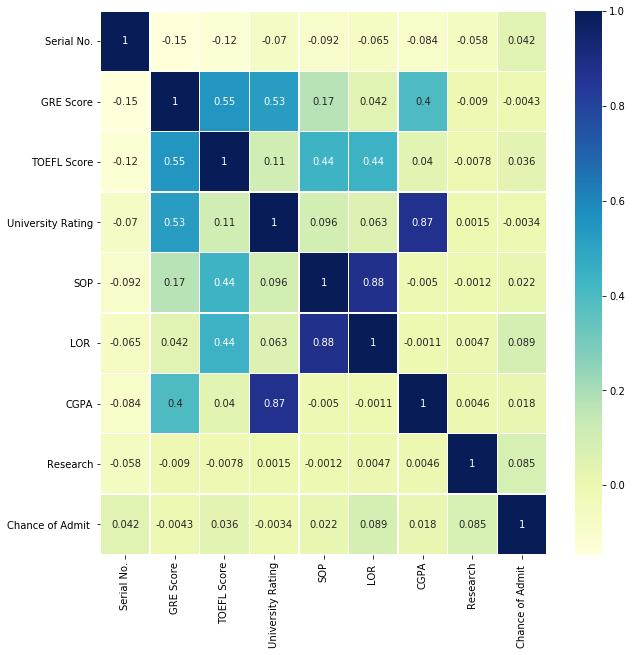

In [0]:
print(detect_outliers(df,3,df.columns[1:8]))
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

abcd=df
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(abcd.corr(),cmap='YlGnBu',annot=True,linewidths=0.5,)

In [0]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
def detect_outliers(df,n,features):
  """
  This function basically takes a dataframe, that contains everything about the features.
	And returs list of index of Observations if it possesses more than nn outliers.
  """
  
  outlier_index = []
  
  # iterate over features(columns)
  for col in features:
    # 1st quartile (25%)
    Q1 = np.percentile(df[col], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(df[col],75)
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # outlier step
    outlier_step = 1.75 * IQR
    
    # Determine a list of index of outliers for feature col
    outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
    
    # append the found outlier indices for col to the list of outlier indices 
    outlier_index.extend(outlier_list_col)
    
  # select observations containing more than n outliers
  outlier_index = Counter(outlier_index)    
  more_than_n_outliers = list( k for k, v in outlier_index.items() if v > n )
  
  return more_than_n_outliers 

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


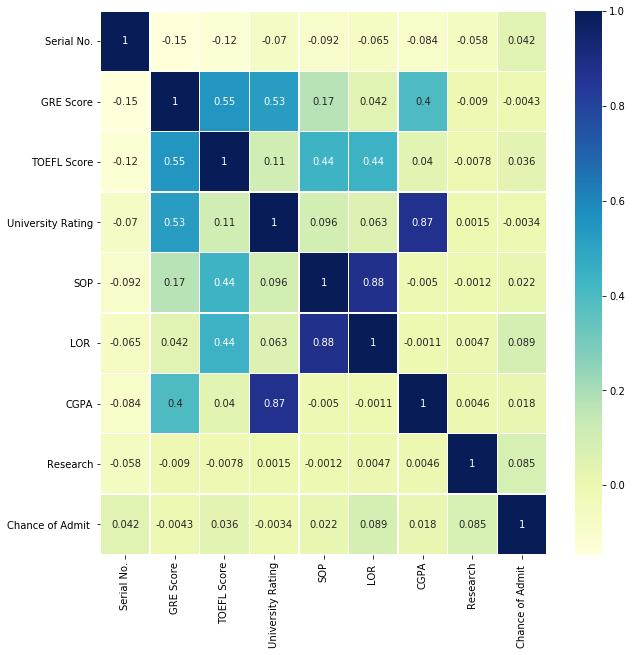

In [0]:
abcd=df
plt.figure(figsize=(10,10))
sns.heatmap(abcd.corr(),cmap='YlGnBu',annot=True,linewidths=0.5,)

# Plotting Graph to see the relationship between features

##Pair plot between two features

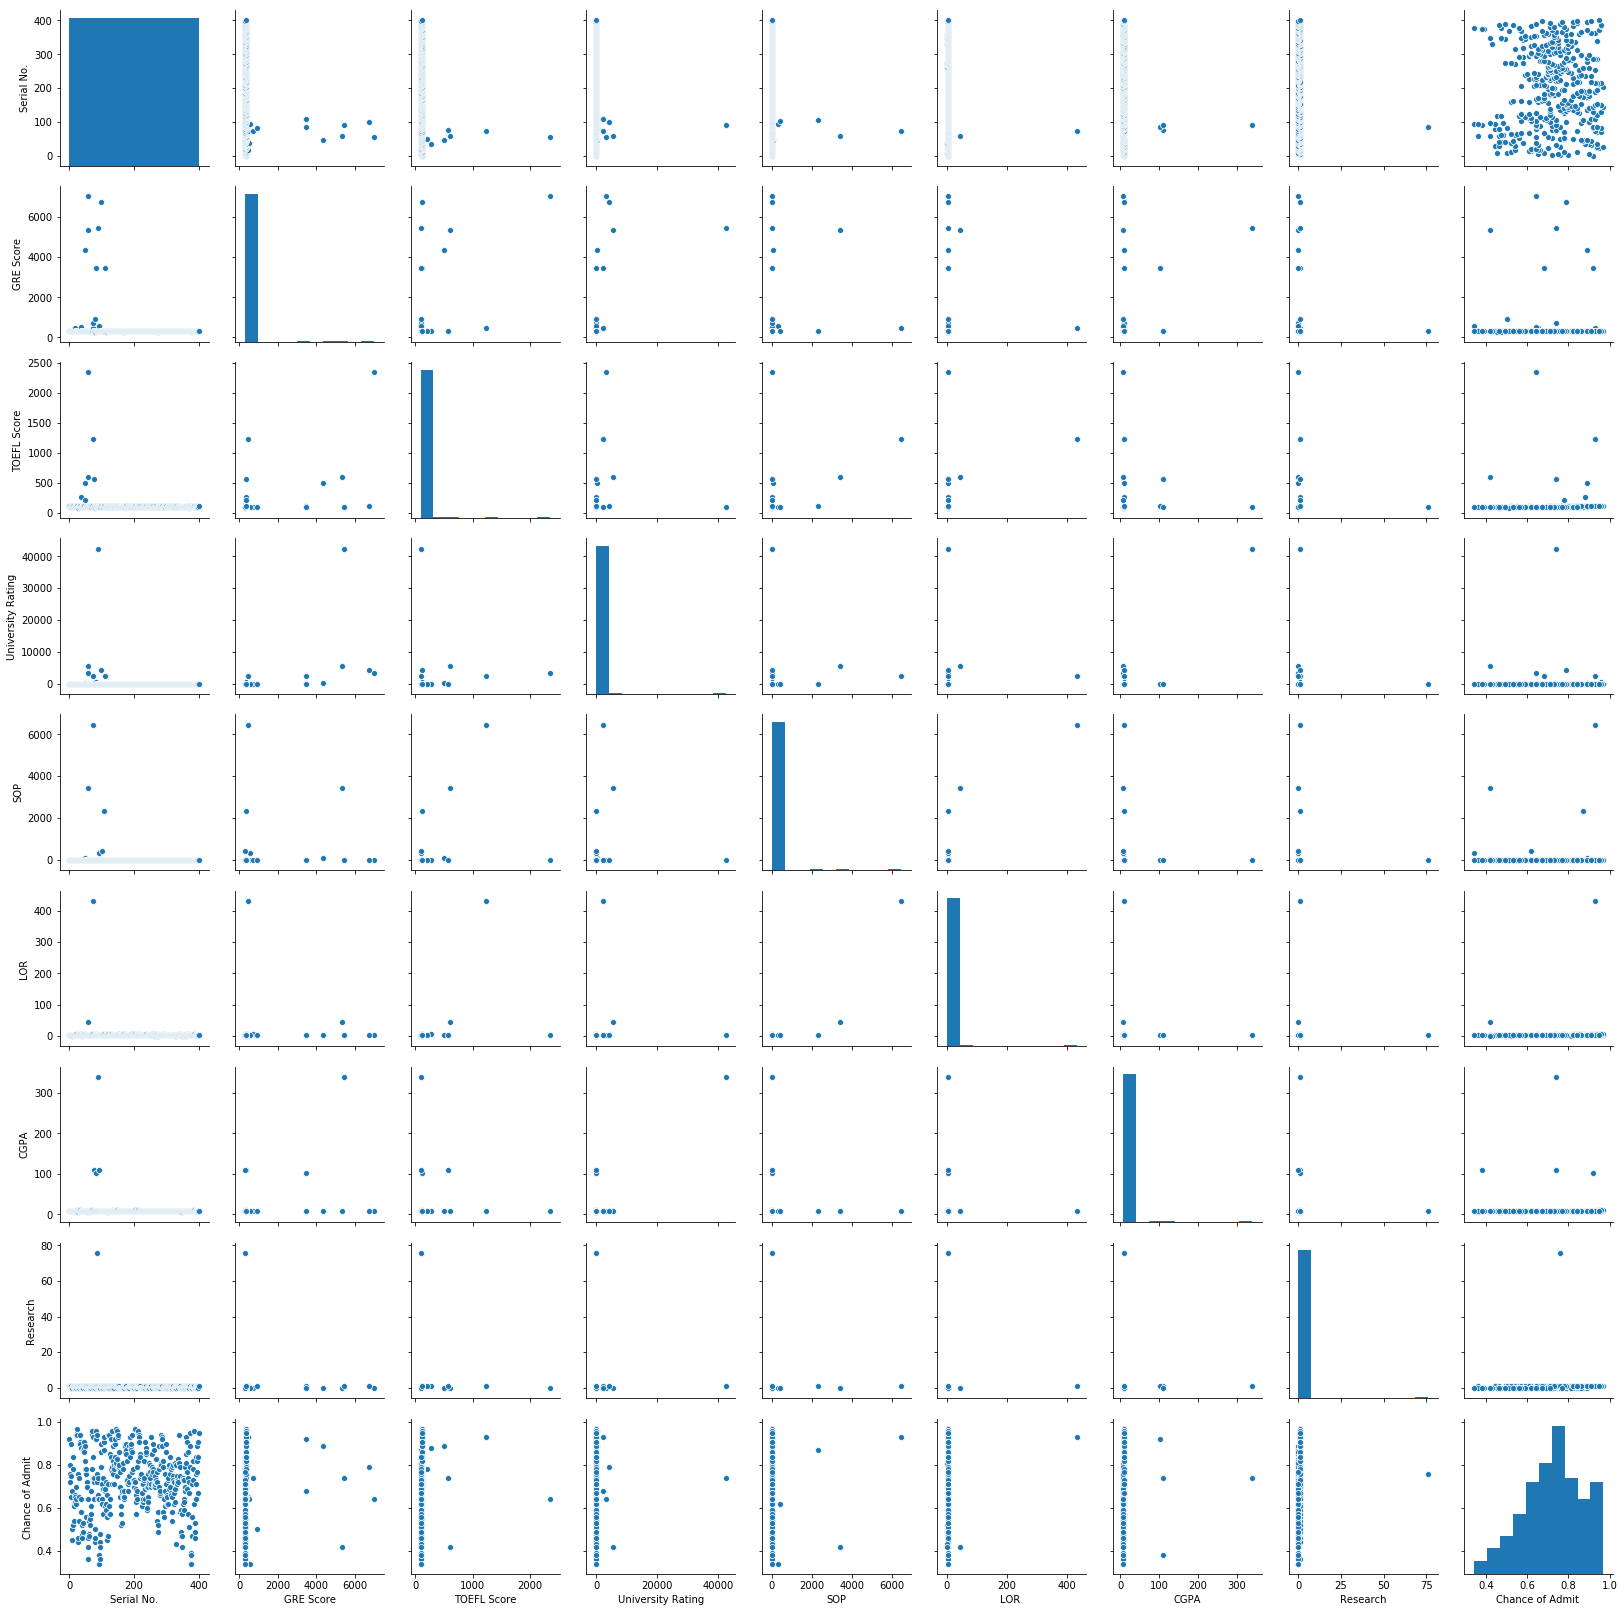

In [0]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


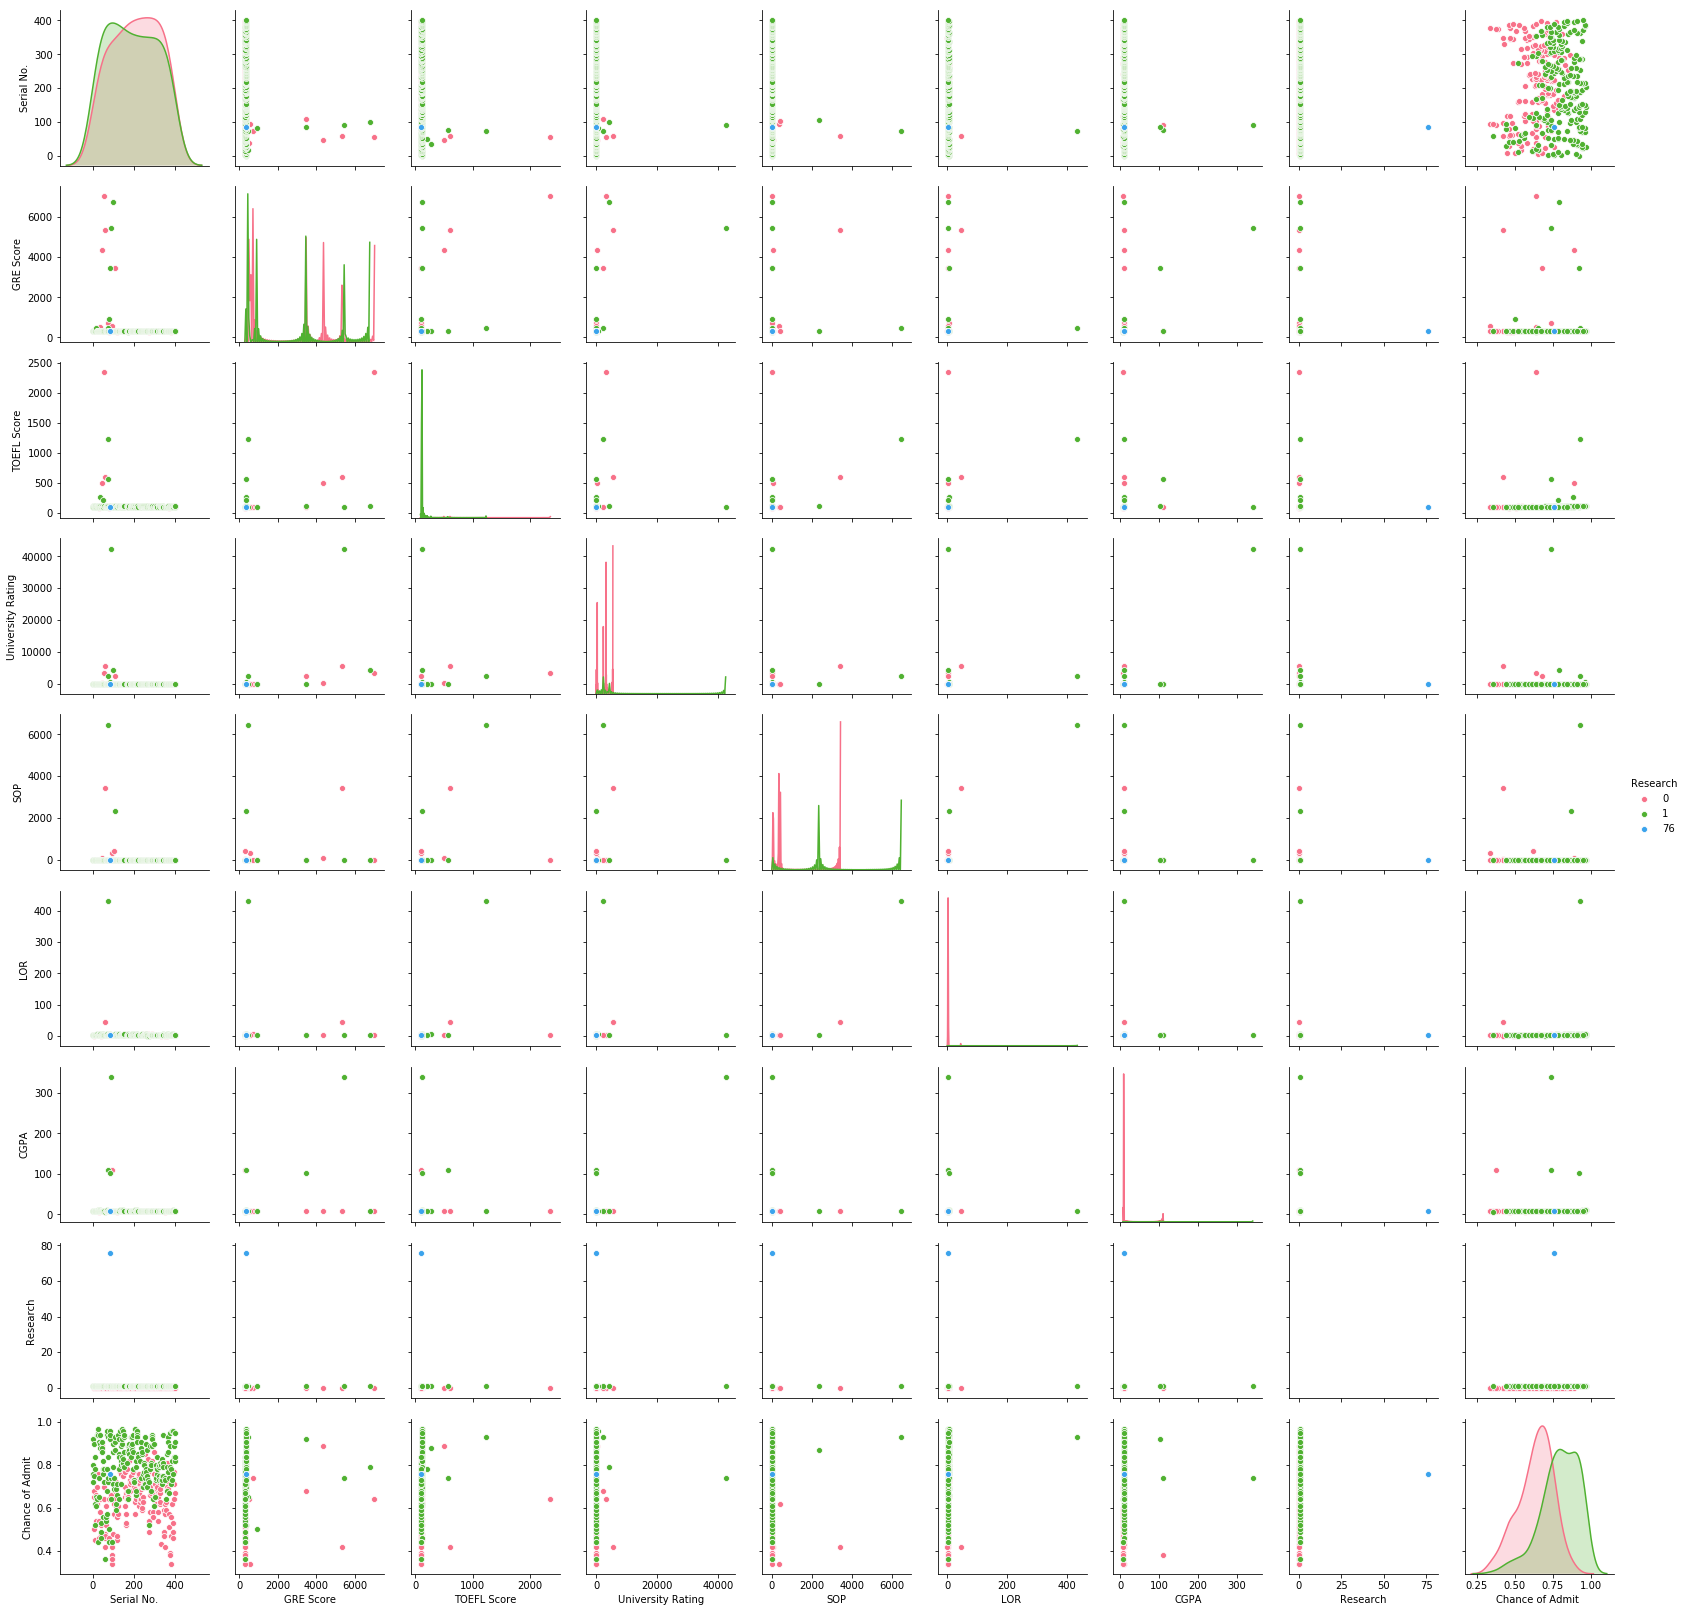

In [0]:
sns.pairplot(df,hue="Research",palette="husl")

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


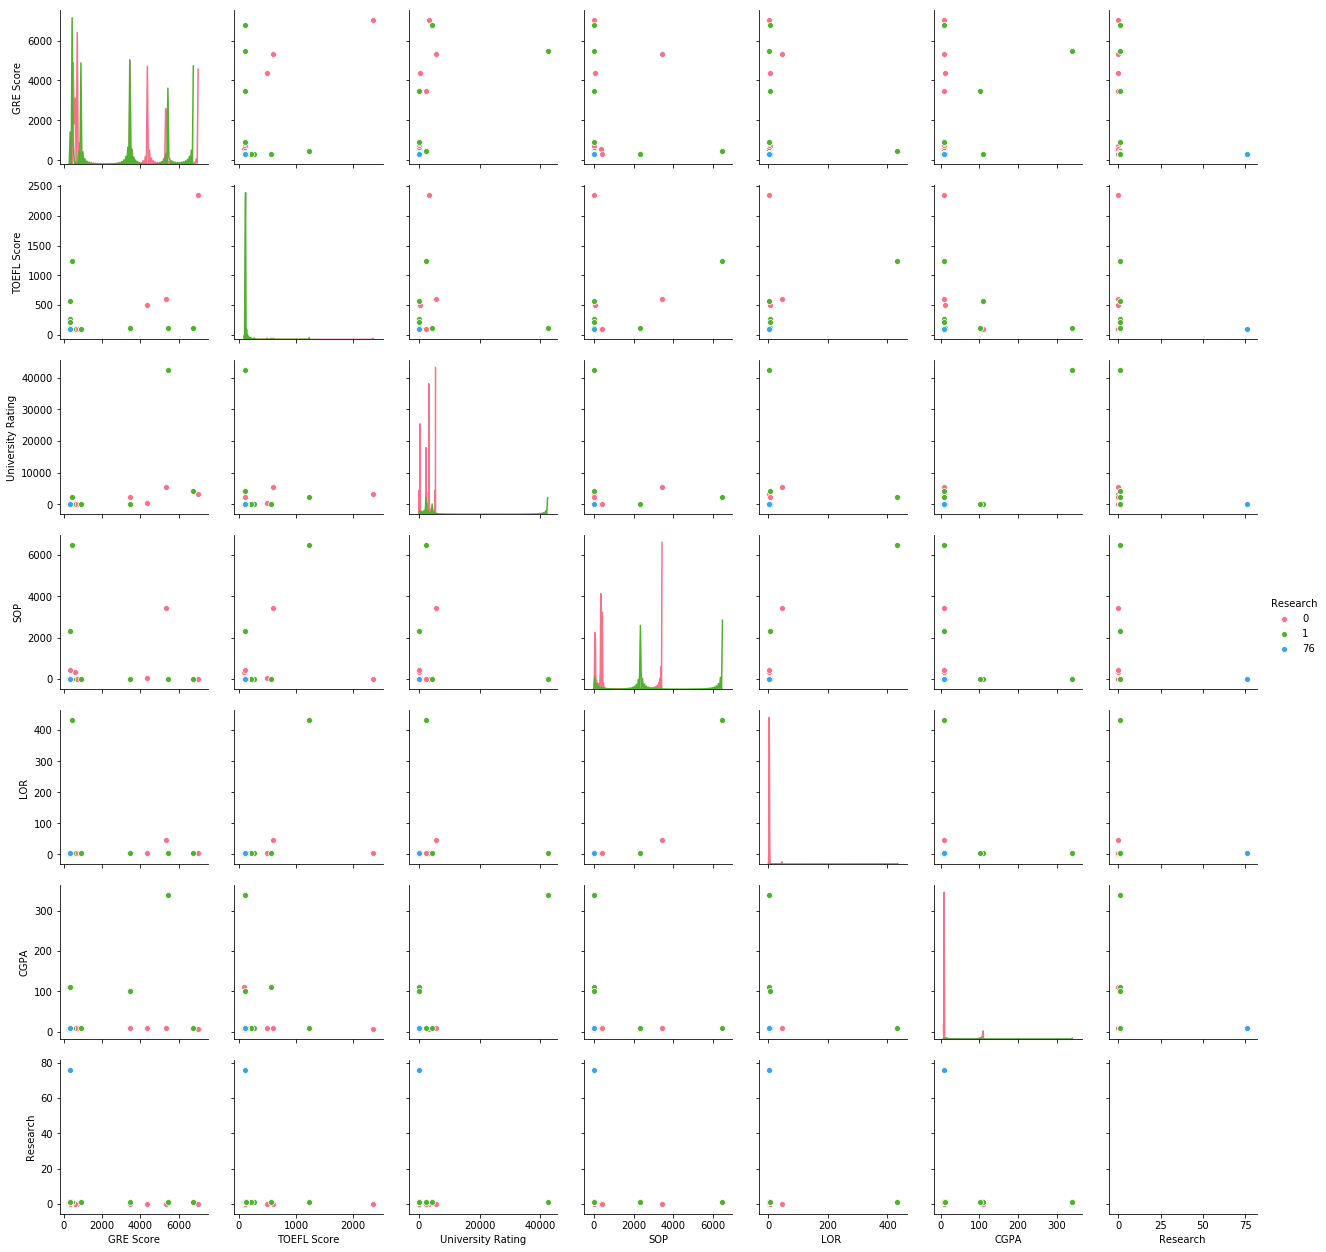

In [0]:
sns.pairplot(df1,hue = 'Research',palette = "husl")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


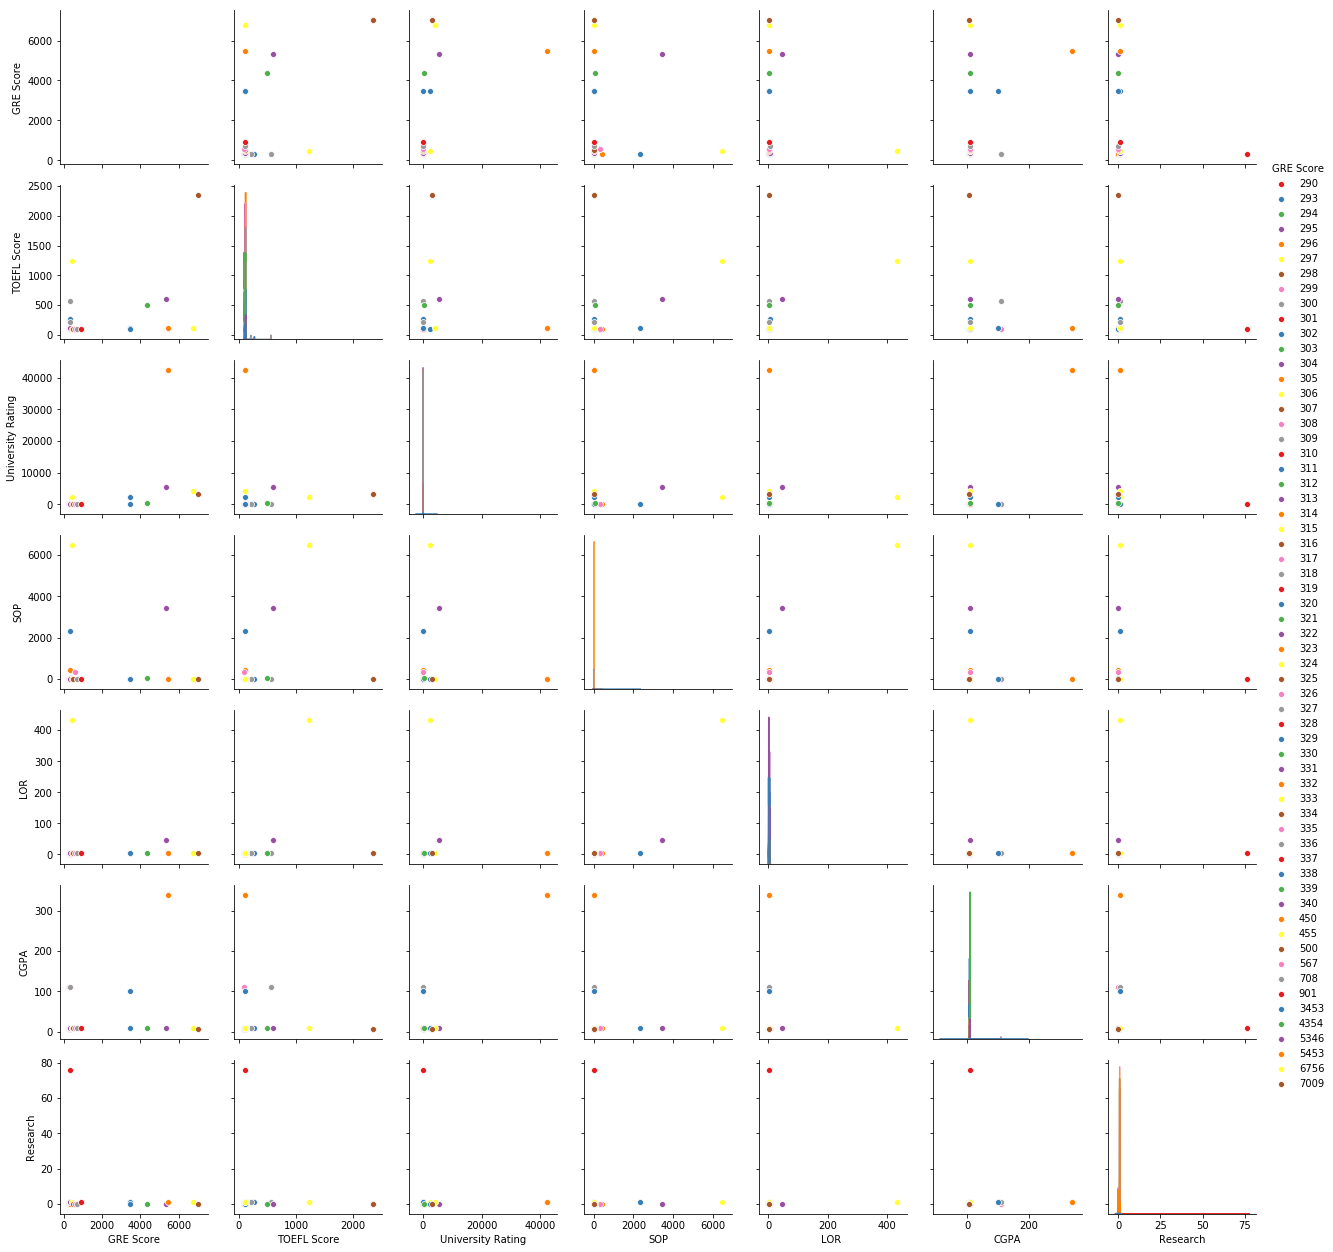

In [0]:
sns.pairplot(df1,hue = "GRE Score", palette = "Set1")

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
df2 = df1.copy()
scalerX = MinMaxScaler(feature_range=(0, 1))
df2[df2.columns] = scalerX.fit_transform(df2[df2.columns])


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


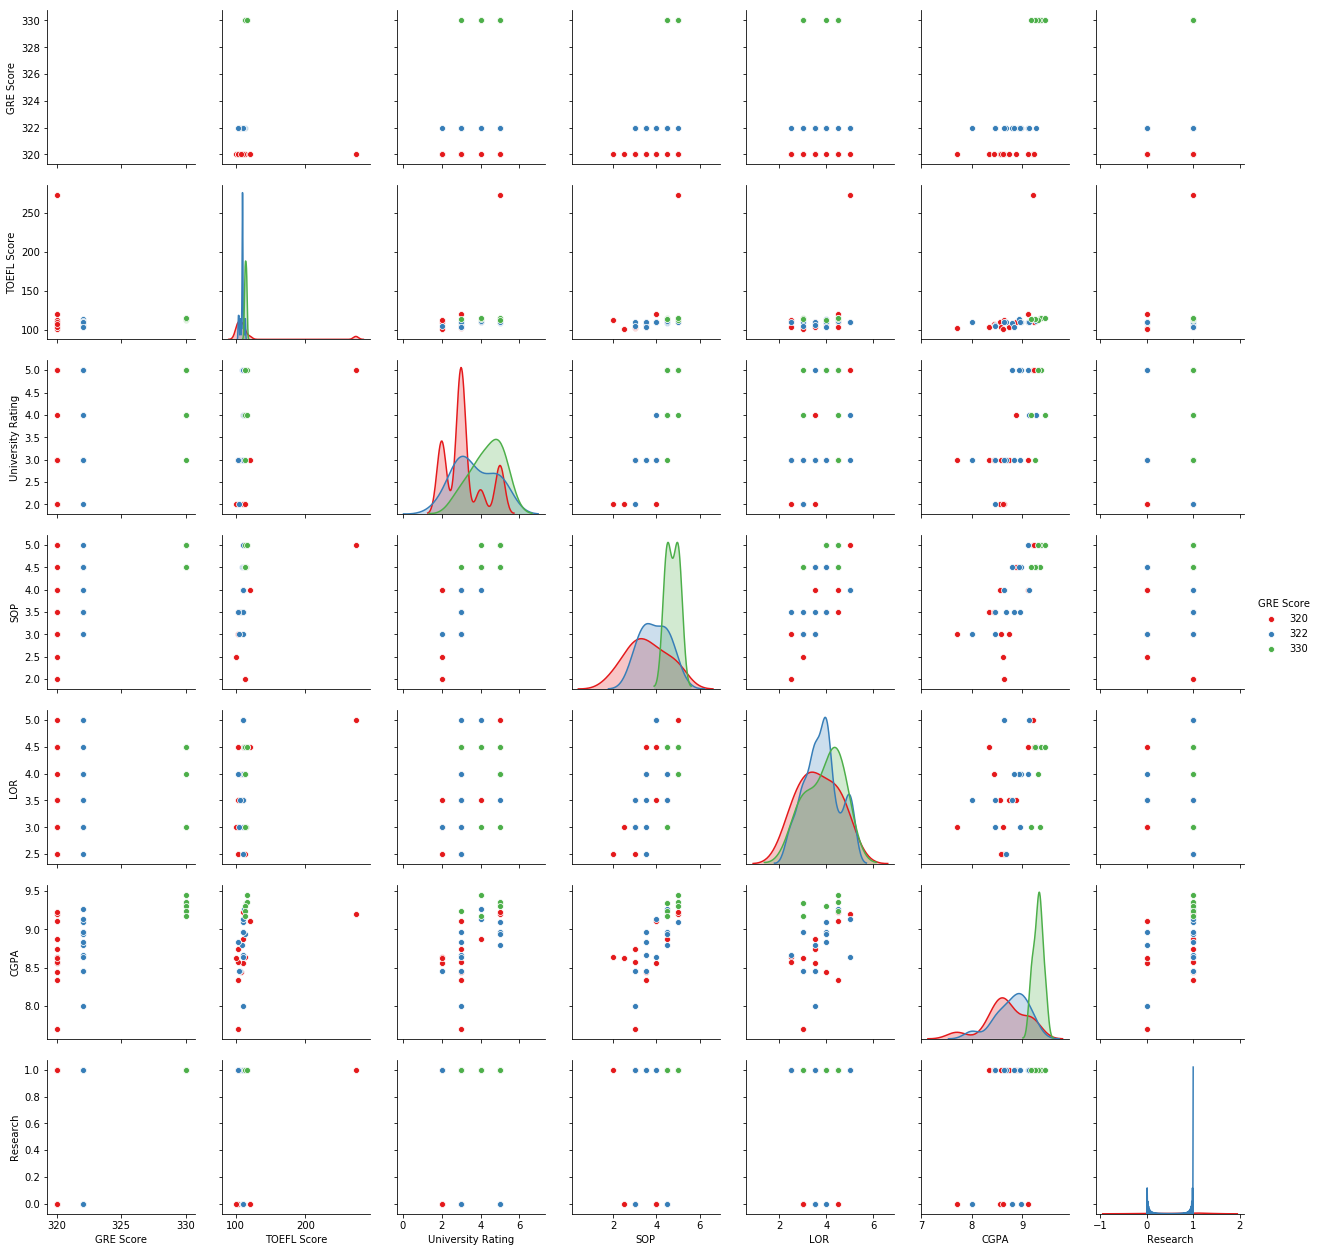

In [0]:
sns.pairplot(df1,hue = "GRE Score",hue_order = [320,322,330],palette = "Set1")

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


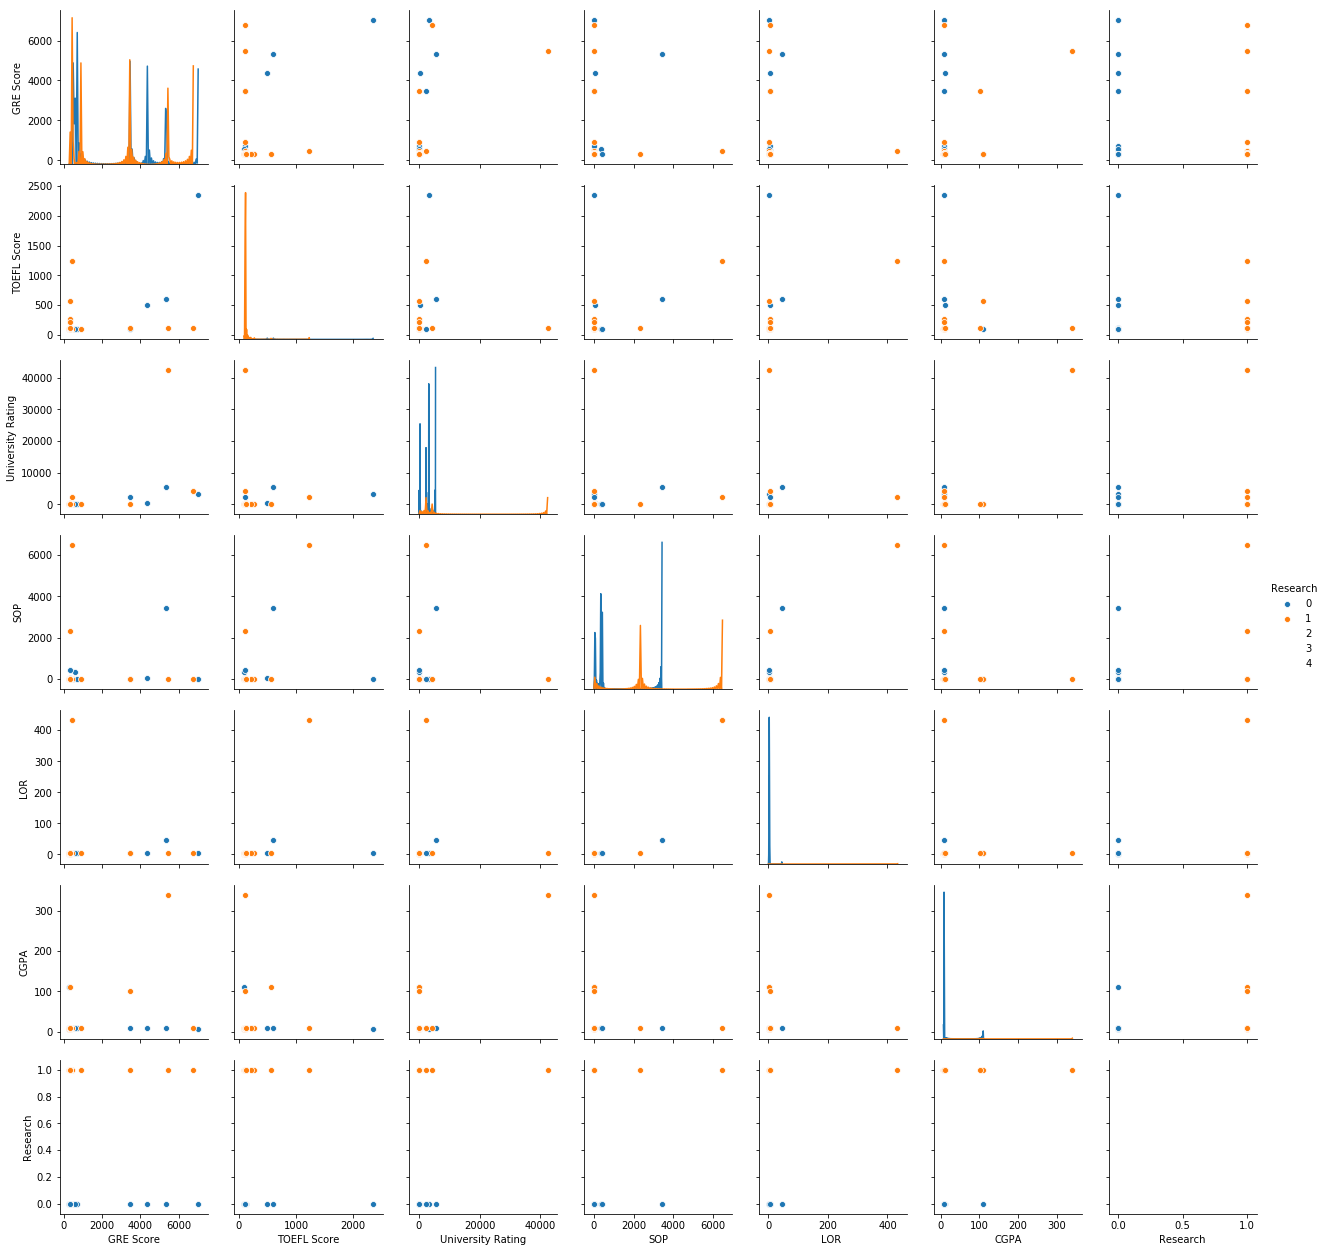

In [0]:
sns.pairplot(df1,hue = "Research",hue_order = [0,1,2,3,4])

In [0]:
df1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

##Heatmap

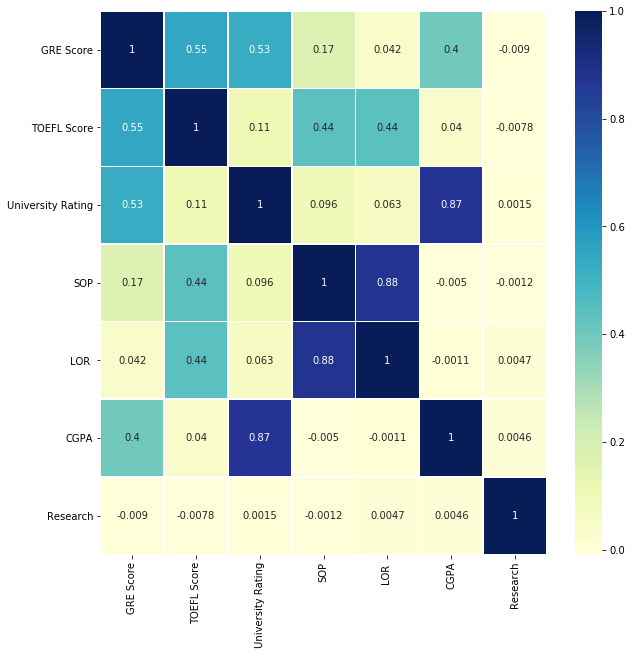

In [0]:
plt.figure(figsize = (10,10))
sns.heatmap(df2.corr(),cmap = "YlGnBu",annot = True,linewidths = 0.5)


##Barplot

**Barplot between GRE Score and Chance of Admit**

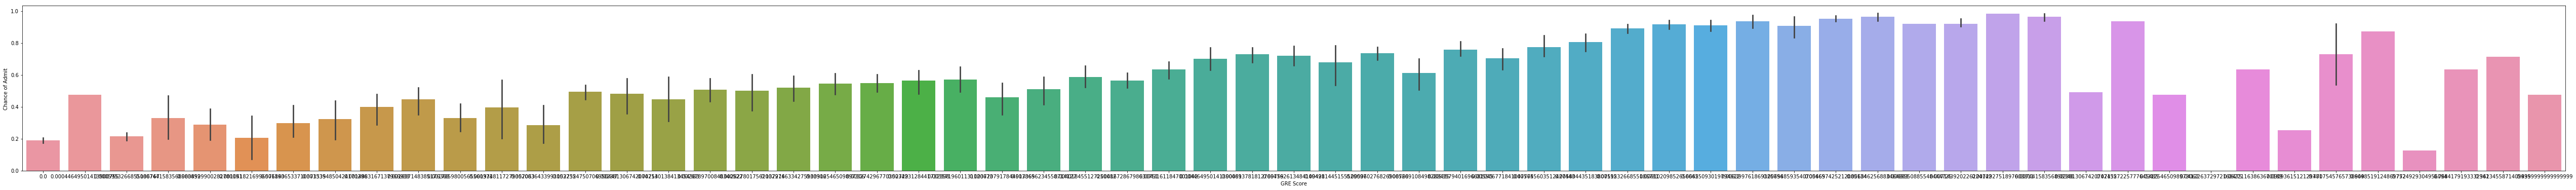

In [0]:
plt.figure(figsize=(90, 6))
df3=df.copy()
scalerX = MinMaxScaler(feature_range=(0, 1))
df3[df3.columns] = scalerX.fit_transform(df3[df3.columns])
sns.barplot(x='GRE Score', y='Chance of Admit ', data=df3)

**Factor plot by combinig Features**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


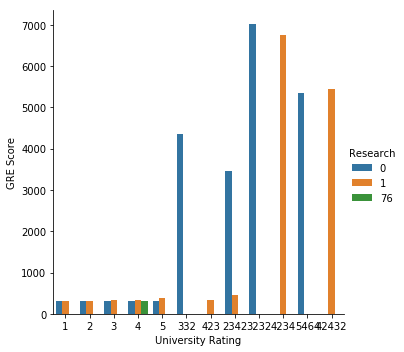

In [0]:
abc = df.groupby(['University Rating','Research']).mean().reset_index()
sns.factorplot(x='University Rating', y='GRE Score', hue='Research', data=abc, kind='bar')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


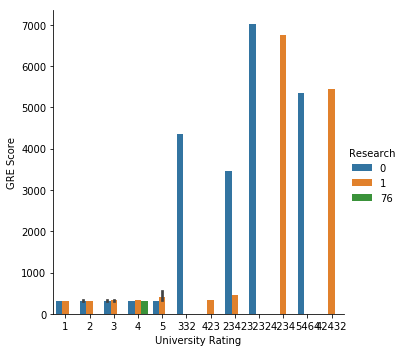

In [0]:
abc = df.groupby(['University Rating','Research','CGPA']).mean().reset_index()
sns.factorplot(x='University Rating', y='GRE Score', hue='Research', data=abc, kind='bar')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


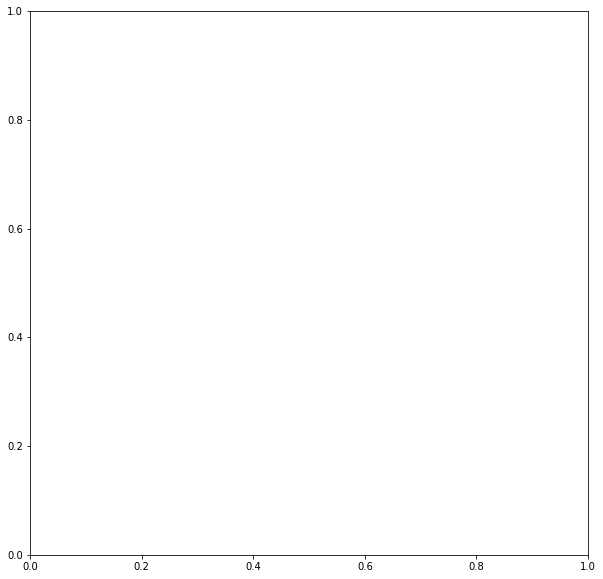

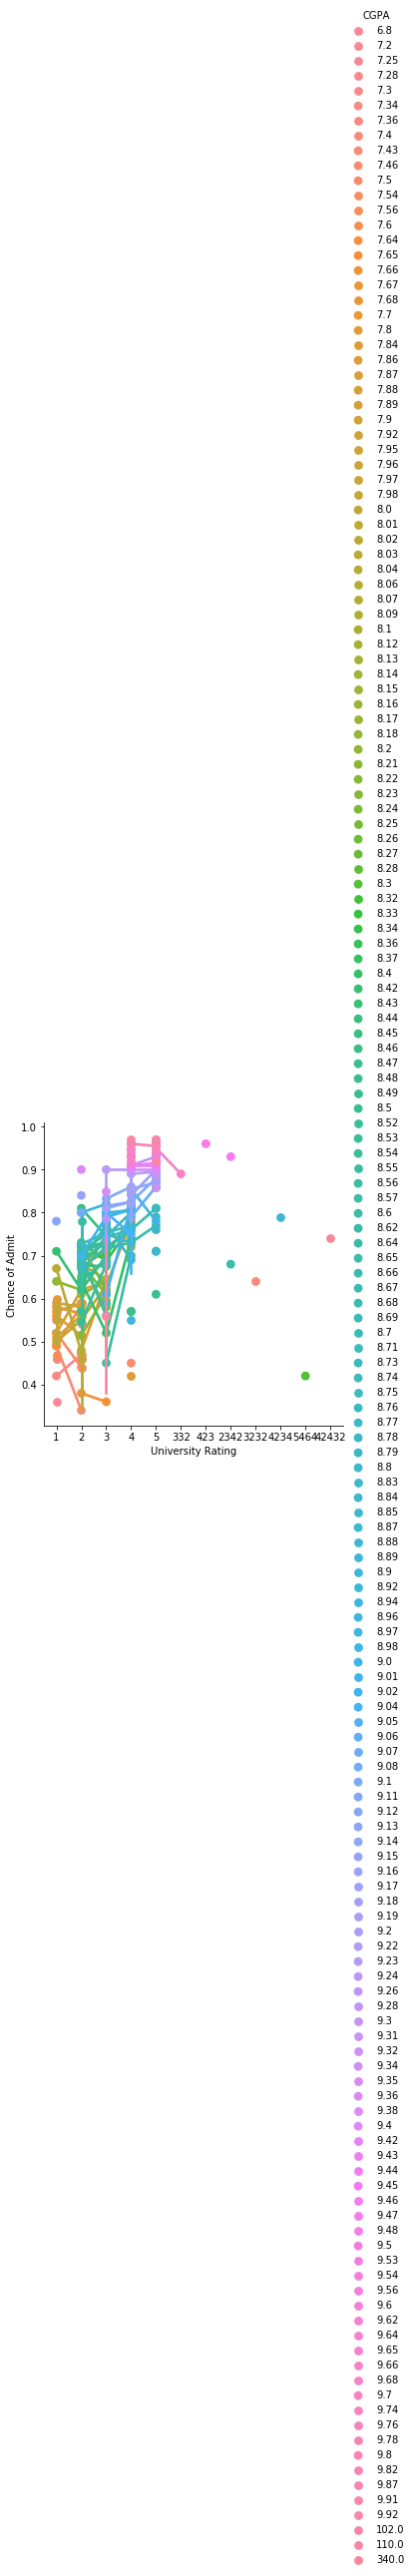

In [0]:
f,ax= plt.subplots(figsize=(10, 10))

abc = df.groupby(['University Rating','Research','CGPA','GRE Score']).mean().reset_index()
sns.factorplot(x='University Rating', y='Chance of Admit ', hue='CGPA', data=abc, kind='point')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


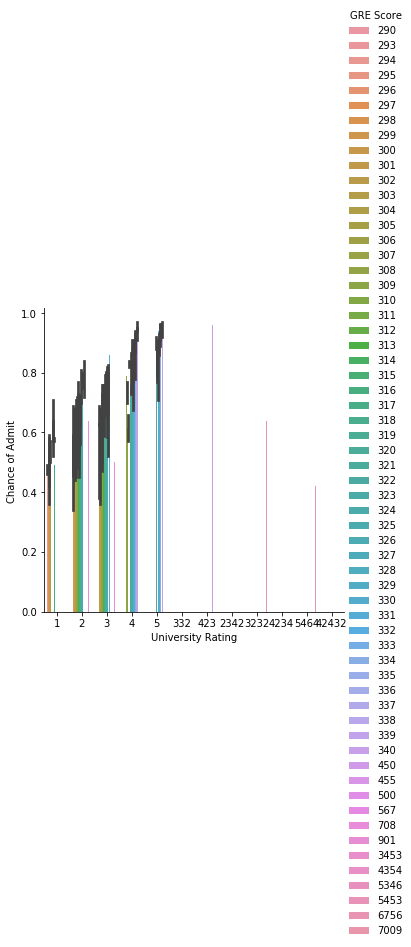

In [0]:
abc = df.groupby(['University Rating','Research','CGPA','GRE Score']).mean().reset_index()
sns.factorplot(x='University Rating', y='Chance of Admit ', hue='GRE Score', data=abc, kind='bar')
plt.show()

# Testing And Validation

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("Admission_Predict_error.csv")
#df.head(5)
df1,df2=df[df.columns[1:8]],df[df.columns[8]]
df1.head(5)
df2.head(5)

train, test = train_test_split(df, test_size=0.2)
train.head(5)
test.head(5)

x_train,y_train =train[train.columns[1:8]],train[train.columns[8]]

x_test,y_test =test[test.columns[1:8]],test[test.columns[8]]

x_train.head(5)
y_train.head(5)

x_test.head(5)
y_test.head(5)


222    0.76
195    0.78
71     0.96
286    0.92
137    0.71
Name: Chance of Admit , dtype: float64

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

from sklearn.ensemble import RandomForestRegressor
import numpy as np

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test)

from sklearn import metrics

  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
errors = abs(y_pred - y_test)

from sklearn.metrics import accuracy_score

mape = 100 * (errors / y_test)

# Calculate and display accuracy

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.04626875000000002
Mean Squared Error: 0.004033540625000001
Root Mean Squared Error: 0.06351016158852063
Accuracy: 92.79 %.


In [0]:
df_new = pd.read_csv("Admission_Predict_error.csv")
#df.head(5)
df_new.drop(['Research'], axis=1)
df_new.sample(5)

df1,df2=df_new[df_new.columns[1:8]],df_new[df_new.columns[8]]
df1.head(5)
df2.head(5)

train, test = train_test_split(df_new, test_size=0.2)
train.head(5)
test.head(5)

test_new=test.drop(['Research'],axis=1)
train_new=train.drop(['Research'],axis=1)

x_train_2,y_train_2 =train_new[train_new.columns[1:7]],train_new[train_new.columns[7]]

x_test_2,y_test_2 =test_new[test_new.columns[1:7]],test_new[test_new.columns[7]]


In [0]:
x_train_2.sample(5)
x_test_2.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
240,296,101,1,2.5,3.0,7.68
103,317,104,2,4.5,4.0,8.47
265,313,102,3,2.5,2.5,8.68
59,5346,600,5464,3434.0,45.0,8.30
215,330,116,5,5.0,4.5,9.36


In [0]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
def detect_outliers(df_new,n,features):
  """
  This function basically takes a dataframe, that contains everything about the features.
	And returs list of index of Observations if it possesses more than nn outliers.
  """
  
  outlier_index = []
  
  # iterate over features(columns)
  for col in features:
    # 1st quartile (25%)
    Q1 = np.percentile(df_new[col], 25)
    # 3rd quartile (75%)
    Q3 = np.percentile(df_new[col],75)
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # outlier step
    outlier_step = 1.75 * IQR
    
    # Determine a list of index of outliers for feature col
    outlier_list_col = df_new[(df_new[col] < Q1 - outlier_step) | (df_new[col] > Q3 + outlier_step )].index
    
    # append the found outlier indices for col to the list of outlier indices 
    outlier_index.extend(outlier_list_col)
    
  # select observations containing more than n outliers
  outlier_index = Counter(outlier_index)    
  more_than_n_outliers = list( k for k, v in outlier_index.items() if v > n )
  
  return more_than_n_outliers 



[47, 59, 72]


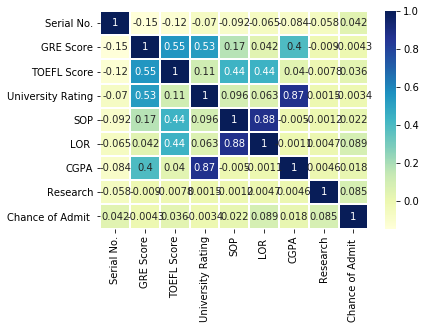

In [0]:
print(detect_outliers(df_new,3,df.columns[1:7]))
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

abcd=df_new
sns.heatmap(abcd.corr(),cmap='YlGnBu',annot=True,linewidths=1,)


Entering new featurre columns 

New1= GRE+CGPA+Uni Rating+TOEFL/4

New2= TOEFL+LOR+SOP/3

New3= Uni Rating+CGPA

New4= SoP+LoR*10





In [0]:
x_train_2['New1']=(x_train_2['GRE Score']+x_train_2['CGPA']+x_train_2['University Rating']+x_train_2['TOEFL Score'])/4
x_train_2['New2']=(x_train_2['TOEFL Score']+x_train_2['SOP']+x_train_2['LOR '])/3
x_train_2['New3']=(x_train_2['University Rating']+x_train_2['CGPA'])
x_train_2['New4']=(x_train_2['SOP']+x_train_2['LOR '])*10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
x_train_2.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,New1,New2,New3,New4
226,306,110,2,3.5,4.0,8.45,106.6125,39.166667,10.45,75.0
393,317,104,2,3.0,3.0,8.76,107.9400,36.666667,10.76,60.0
351,325,110,4,3.5,4.0,8.67,111.9175,39.166667,12.67,75.0
297,320,120,3,4.0,4.5,9.11,113.0275,42.833333,12.11,85.0
287,324,114,5,5.0,4.5,9.08,113.0200,41.166667,14.08,95.0


In [0]:
x_test_2['New1']=(x_test_2['GRE Score']+x_test_2['CGPA']+x_test_2['University Rating']+x_test_2['TOEFL Score'])/4
x_test_2['New2']=(x_test_2['TOEFL Score']+x_test_2['SOP']+x_test_2['LOR '])/3
x_test_2['New3']=(x_test_2['University Rating']+x_test_2['CGPA'])
x_test_2['New4']=(x_test_2['SOP']+x_test_2['LOR '])*10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
x_test_2.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,New1,New2,New3,New4
371,324,110,3,3.5,3.0,9.22,111.5550,38.833333,12.22,65.0
199,313,107,3,4.0,4.5,8.69,107.9225,38.500000,11.69,85.0
250,320,104,3,3.0,2.5,8.57,108.8925,36.500000,11.57,55.0
218,324,110,4,3.0,3.5,8.97,111.7425,38.833333,12.97,65.0
375,304,101,2,2.0,2.5,7.66,103.6650,35.166667,9.66,45.0


In [0]:
y_train_2.sample(5)

0      0.92
320    0.75
133    0.79
45     0.88
308    0.69
Name: Chance of Admit , dtype: float64

In [0]:
y_test_2.sample(5)

367    0.57
100    0.71
307    0.80
57     0.46
340    0.75
Name: Chance of Admit , dtype: float64

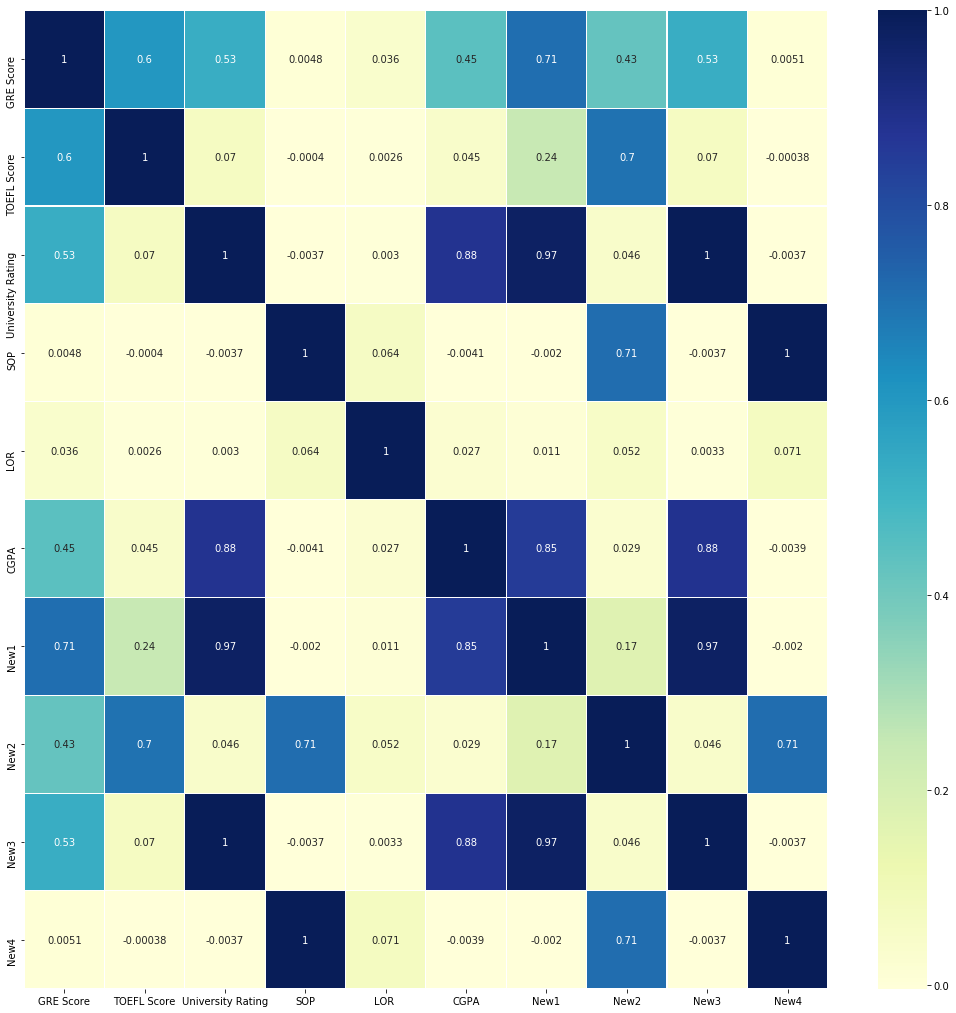

In [0]:
f,ax = plt.subplots(figsize=(18, 18))
abcd=x_train_2
sns.heatmap(abcd.corr(),cmap='YlGnBu',annot=True,linewidths=0.05)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
x_train_2 = sc.fit_transform(x_train_2)  
x_test_2 = sc.transform(x_test_2)

from sklearn.ensemble import RandomForestRegressor
import numpy as np

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(x_train_2, y_train_2)  
y_pred_2 = regressor.predict(x_test_2)

from sklearn import metrics

  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_pred_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2))) 
errors = abs(y_pred_2 - y_test_2)

from sklearn.metrics import accuracy_score

mape = 100 * (errors / y_test_2)

# Calculate and display accuracy

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.05212499999999999
Mean Squared Error: 0.00592216875
Root Mean Squared Error: 0.07695562844912644
Accuracy: 91.71 %.


**The Model is Trained and Tested on the Machine Learning models**